# 데이터마이닝 6주차 실습
## Logistic Regression
+ classification
+ $f(x) = \frac1{1+e^{-(\beta_0+\beta_1\mathbf{X}_1+\beta_2\mathbf{X}_2+...+\beta_n\mathbf{X}_n)}}$
+ $odds = \frac p{1-p}$, $p=\mathbf{P}(\mathbf{Y}=1|\mathbf{X})$
+ $log(odds) = \beta_0+\beta_1\mathbf{X}_1+\beta_2\mathbf{X}_2+...+\beta_n\mathbf{X}_n$

In [29]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# set figure params (figure size, font size)
plt.rc('figure', figsize=(10, 8))
plt.rc('font', size=13)
import warnings
warnings.filterwarnings('ignore')

## 1. Example : single variable
### 1.1 Dataset
+ 인체치수조사
+ columns
    - height (X)
    - gender (y)

In [30]:
# load dataset
body = pd.read_csv("height_gender.txt", sep='\t', names=['height', 'gender'])
body.head()

,height,gender
0,149.4,woman
1,169.6,man
2,169.6,man
3,172.5,man
4,178.9,man


### 1.2 Model
+ sklearn

#### 1.2.1 fitting

In [31]:
# import scikit-learn LogisticRegression estimator
from sklearn.linear_model import LogisticRegression

In [32]:
X = body[['height']].copy()
y = body['gender'].copy()

# factorization - woman:0 man:1
y,_=pd.factorize(y)
y

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

+ Maximum Liklihood Estimation (MLE)
    - $\ln L(X,y,\beta) = \sum [y_i \ln(\sigma(x_i,\beta))+(1-y_i)\ln(1-\sigma(x_i,\beta))] $

In [33]:
# solver : 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
logistic_reg = LogisticRegression(solver='lbfgs')
logistic_reg.fit(X,y)

LogisticRegression()

In [34]:
logistic_reg.classes_

array([0, 1], dtype=int64)

In [35]:
logistic_reg.intercept_

array([-61.84911788])

In [36]:
logistic_reg.coef_

array([[0.37475973]])

#### 1.2.2 prediction
+ $p(y=1|x) = \frac1{1+e^{-(\beta_0+\beta_1\mathbf{X}_1)}}$

In [37]:
# predict prob
me = np.array([[177]])
logistic_reg.predict_proba(me)

array([[0.0111693, 0.9888307]])

In [38]:
1 / (1 + np.exp(-(np.sum(logistic_reg.intercept_ + logistic_reg.coef_[0]*me, axis=1))))

array([0.9888307])

In [39]:
logistic_reg.predict(me)

array([1], dtype=int64)

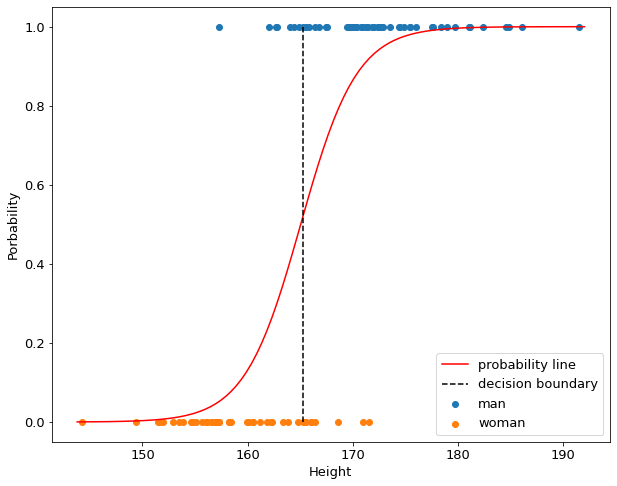

In [40]:
# plot logstic function
X_new = np.linspace(X.min()-0.5, X.max()+0.5, 100).reshape(-1,1)
y_proba = logistic_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure()
plt.scatter(x=X[y==1], y=y[y==1], label='man')
plt.scatter(x=X[y==0], y=y[y==0], label='woman')
#plt.scatter(x=X[pred_y==1], y=pred_y[pred_y==1], label='predicted_man')
#plt.scatter(x=X[pred_y==0], y=pred_y[pred_y==0], label='predicted_woman')
plt.plot(X_new, y_proba[:,1], color= 'r', label = 'probability line')
plt.plot([decision_boundary, decision_boundary], [0, 1], "k--", label='decision boundary')
plt.legend()
plt.xlabel("Height")
plt.ylabel("Porbability")
plt.show()

In [41]:
# accuracy
logistic_reg.score(X,y)

0.84

## 2. Multiple logistic regression
### 2.1 Dataset
+ Credit card default dataset
    - a simulated data set containing information on ten thousand customers.  
    The aim here is to predict which customers will default on their credit card debt.
    - a data frame with 10000 observations on the following 4 variables.
+ Columns
    - default (채무 불이행) : a factor with levels No and Yes indicating whether the customer defaulted on their debt 
    - student : a factor with levels No and Yes indicating whether the customer is a student
    - balance (잔고) : the average balance that the customer has remaining on their credit card after making their monthly payment
    - income (수입) : income of customer
+ Refrences
    - James, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning with applications in R, https://www.statlearning.com, Springer-Verlag, New York

In [42]:
# load dataset
df = pd.read_csv('default.csv')
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [44]:
df.describe(include='all')

,default,student,balance,income
count,10000,10000,10000.000000,10000.000000
unique,2,2,NaN,NaN
top,No,No,NaN,NaN
freq,9667,7056,NaN,NaN
mean,NaN,NaN,835.374886,33516.981876
std,NaN,NaN,483.714985,13336.639563
min,NaN,NaN,0.000000,771.967729
25%,NaN,NaN,481.731105,21340.462903
50%,NaN,NaN,823.636973,34552.644802
75%,NaN,NaN,1166.308386,43807.729272


In [45]:
# class imbalance
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

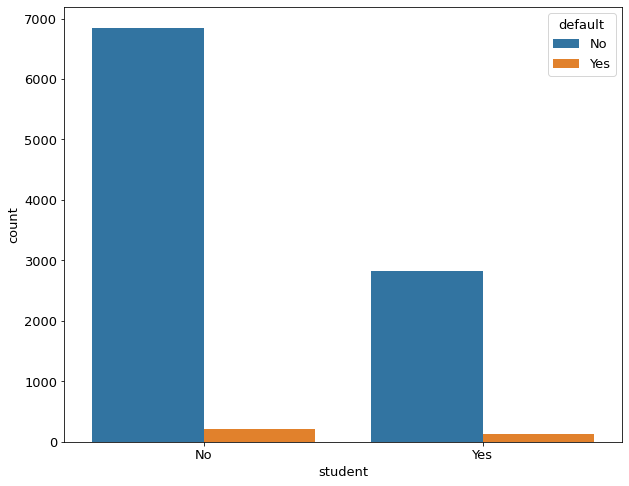

In [46]:
# count chart
sns.countplot(x='student', hue='default', data=df)
plt.show()

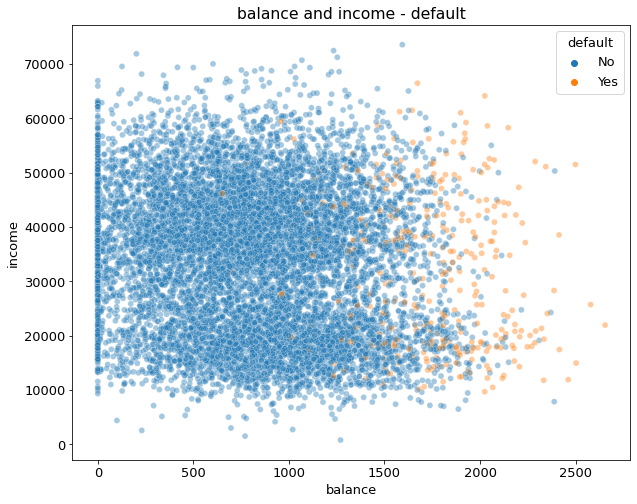

In [47]:
# scatterplot, box plot
f1 = 'balance'
f2 = 'income'
target = 'default'
fig, ax = plt.subplots()
sns.scatterplot(x=f1, y=f2, hue=target, data=df,
               alpha=0.4)
plt.title('{} and {} - {}'.format(f1,f2,target))
plt.show()

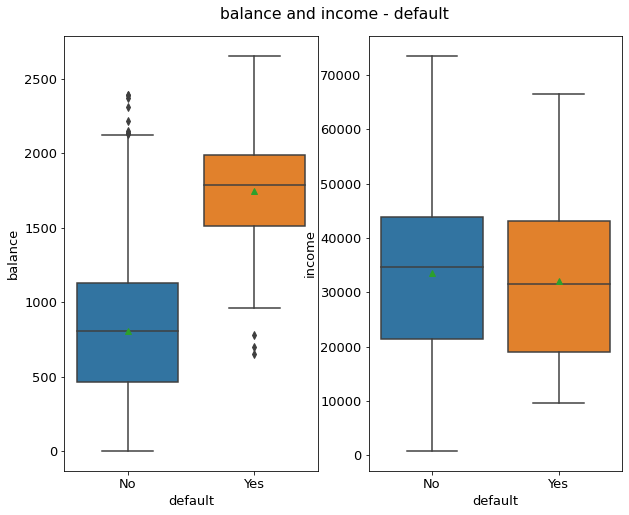

In [48]:
# box plot
fig, ax = plt.subplots(1,2)
sns.boxplot(x=target, y=f1, data=df, 
            showmeans=True, 
            ax=ax[0])
sns.boxplot(x=target, y=f2, data=df, 
            showmeans=True, 
            ax=ax[1])
plt.suptitle('{} and {} - {}'.format(f1,f2,target), y=0.93)
plt.show()

### 2.2. Model
+ using statmodels

#### 2.2.1 fitting

In [49]:
import statsmodels.api as sm

In [50]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [51]:
# categorical variables encoding - dummy varaibles
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [52]:
logistic_reg = sm.Logit.from_formula("default_Yes ~ balance + income + student_Yes", 
                                     df_encoded)
result = logistic_reg.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 04 Apr 2022   Pseudo R-squ.:                  0.4619
Time:                        01:52:43   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance         0.0057   

In [53]:
# coefficients
result.params

Intercept     -10.869045
balance         0.005737
income          0.000003
student_Yes    -0.646776
dtype: float64

+ balance, income은 양수, student는 음수
+ Odds ratio
    - 다른 설명변수는 고정 시킨 후, 해당 변수를 1단위로 증가 시켰을 때 변화하는 odds의 비율
    - 1보다 크면 채무 불이행을 할 확률이 증가함. 0~1이면 감소
    - balance의 odds ratio = 1.005 -> balance가 1 증가하면 채무 불이행 확률이 1.005배증가

In [54]:
# odds ratio
print(np.exp(result.params))

Intercept      0.000019
balance        1.005753
income         1.000003
student_Yes    0.523732
dtype: float64


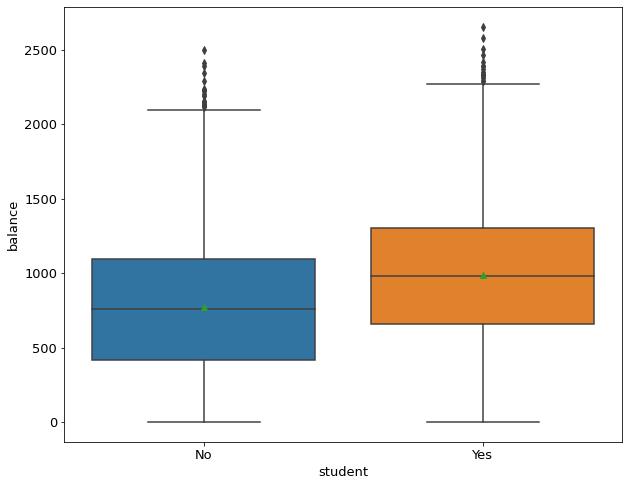

In [55]:
# confounding student - balance
fig, ax = plt.subplots()
sns.boxplot(x='student', y='balance', data=df, 
            showmeans=True)
plt.show()

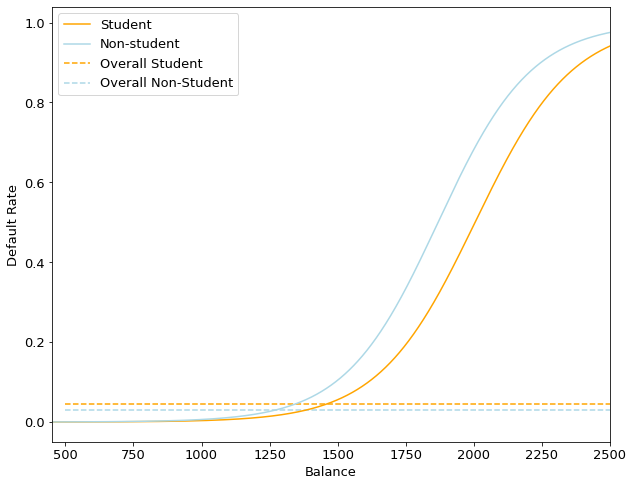

In [56]:
X_train = df[df.student == 'Yes'].balance.values.reshape(df[df.student=='Yes'].balance.size,1)
y = df[df.student == 'Yes'].default
X_train2 = df[df.student == 'No'].balance.values.reshape(df[df.student == 'No'].balance.size,1) 
y2 = df[df.student == 'No'].default
X_new = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

log_reg1 = LogisticRegression(solver='newton-cg')
log_reg2 = LogisticRegression(solver='newton-cg')
log_reg1.fit(X_train,y)
log_reg2.fit(X_train2,y2)
prob = log_reg1.predict_proba(X_new)
prob2 = log_reg2.predict_proba(X_new)

fig = plt.subplots()
plt.plot(X_new, pd.DataFrame(prob)[1], color='orange', label='Student')
plt.plot(X_new, pd.DataFrame(prob2)[1], color='lightblue', label='Non-student')
plt.hlines(127/2817, colors='orange', label='Overall Student',
           xmin=500, xmax=2500, linestyles='dashed')
plt.hlines(206/6850, colors='lightblue', label='Overall Non-Student',
           xmin=500, xmax=2500, linestyles='dashed')
plt.ylabel('Default Rate')
plt.xlabel('Balance')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
plt.xlim(450,2500)
plt.legend(loc=2)
plt.show()